# Task 3 – Dashboard Design (Data Analyst Internship)
Dataset: train.csv | Tool: Python (Pandas + Matplotlib/Seaborn)


In [12]:
#  Import Libraries & Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Load dataset
file_path = r"C:\Users\susan\Downloads\archive (6)\train.csv"
df = pd.read_csv(file_path)

# Preview data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
#  Dataset Overview
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- Data Types & Non-Nulls ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Numerical Summary ---")
print(df.describe())


Rows: 9800, Columns: 18

--- Data Types & Non-Nulls ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 

In [14]:
#  Data Cleaning
# Drop missing values (you can also fillna if needed)
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Confirm cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [17]:
# 📌 CELL 4: Feature Engineering (Safe and Clean)

# Step 1: Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()

# Step 2: Check column existence
if 'Order Date' in df.columns:
    # Step 3: Convert to datetime safely
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    
    # Step 4: Drop rows with invalid dates (NaT)
    df = df.dropna(subset=['Order Date']).copy()

    # Step 5: Extract features
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month
    df['Quarter'] = df['Order Date'].dt.quarter

    # Preview
    display(df[['Order Date', 'Year', 'Month', 'Quarter']].head())
else:
    print("❌ 'Order Date' column not found in the dataset.")


,Order Date,Year,Month,Quarter
0,2017-08-11,2017,8,3
1,2017-08-11,2017,8,3
2,2017-12-06,2017,12,4
3,2016-11-10,2016,11,4
4,2016-11-10,2016,11,4


In [20]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Year', 'Month', 'Quarter']


In [22]:
#  KPI Calculations (Using available columns)
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()

print(f"✅ Total Sales: ₹{total_sales:,.2f}")
print(f"✅ Total Orders: {total_orders}")


✅ Total Sales: ₹865,743.24
✅ Total Orders: 1971


Region
West       271156.6335
East       239607.7510
Central    208805.0696
South      146173.7895
Name: Sales, dtype: float64


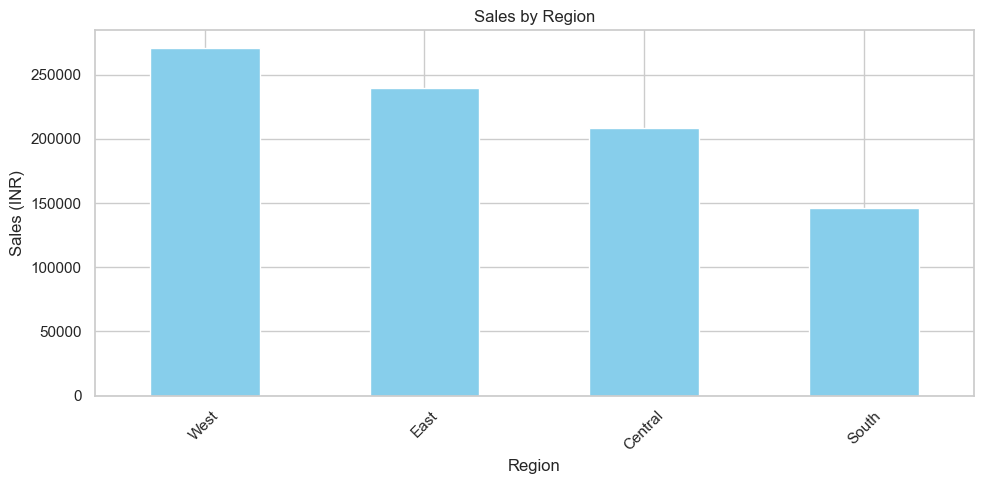

In [23]:
# Region-wise Sales
region_data = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_data)

# Plot
region_data.plot(kind='bar', title="Sales by Region", color='skyblue')
plt.ylabel("Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Category         Sub-Category
Technology       Phones          123238.3420
Furniture        Chairs          121911.7450
                 Tables           88768.3035
Office Supplies  Storage          84433.2060
Technology       Machines         83658.1960
                 Accessories      69708.6500
Office Supplies  Binders          64742.9220
Technology       Copiers          55739.1220
Furniture        Bookcases        36873.9721
Office Supplies  Appliances       35826.7490
Furniture        Furnishings      32888.7520
Office Supplies  Paper            29736.3060
                 Supplies         13014.1020
                 Art              12507.3240
                 Envelopes         5751.9420
                 Labels            5698.2980
                 Fasteners         1245.3120
Name: Sales, dtype: float64


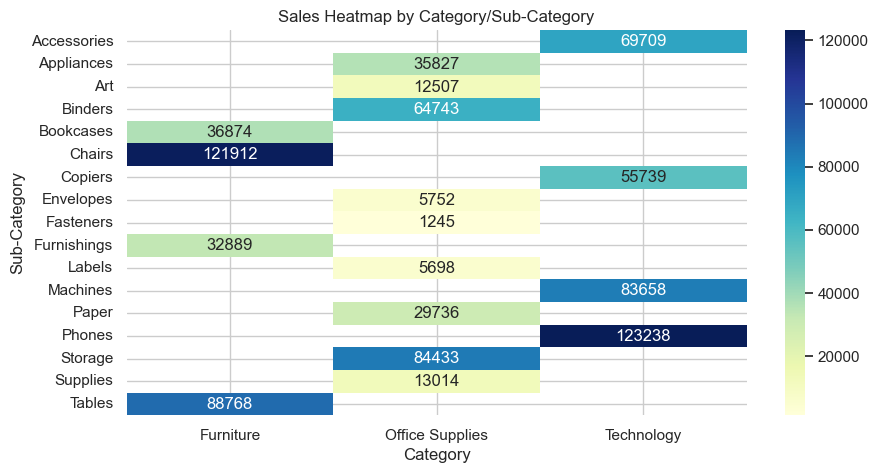

In [24]:
#  Category & Sub-Category Sales Analysis
category_data = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)
print(category_data)

# Heatmap
pivot = df.pivot_table(index='Sub-Category', columns='Category', values='Sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Sales Heatmap by Category/Sub-Category")
plt.show()


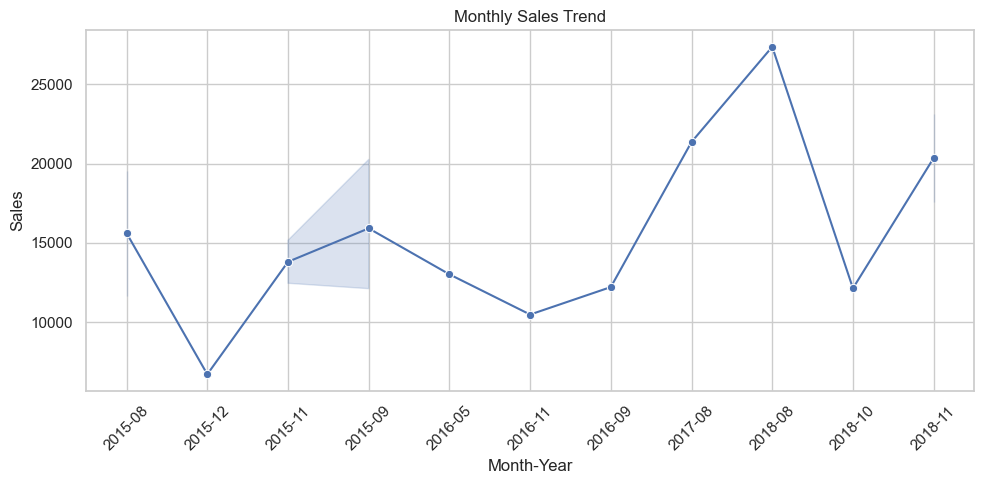

In [25]:
#  Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Year'].astype(str) + "-" + df['Month'].astype(str).str.zfill(2)

# Plot
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.show()


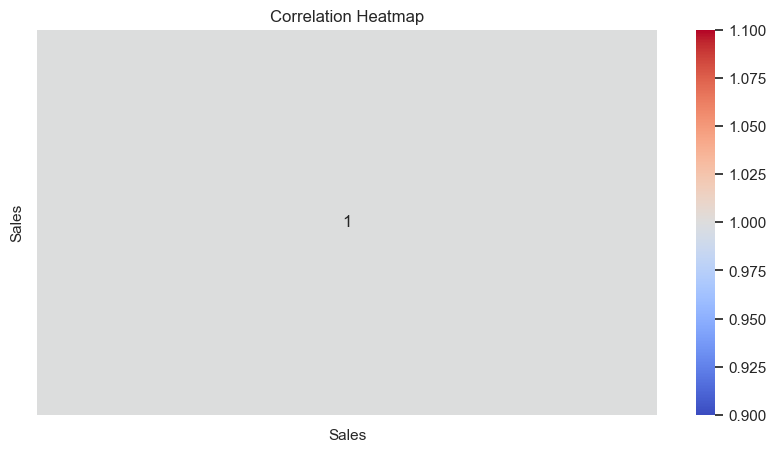

In [26]:
#  Correlation Heatmap (Only Sales since Profit/Discount are missing)
sns.heatmap(df[['Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
